In [1]:
import pandas as pd
import os
os.chdir('../')
from kernel import utils, data_processing, modelling

In [2]:
df = pd.read_parquet('./data/train_transaction.parquet').pipe(utils.detect_id_col)

No valid id column found.


In [5]:
df.set_index('TransactionID', inplace=True)

In [6]:
df = pd.concat([df[df.isFraud == 1], df[df.isFraud == 0].sample(frac=0.1)], axis=0)

In [7]:
df_fea, labels = utils.split_feature_target(df, 'isFraud')
df_fea.head()

,V207,V196,V102,V195,V228,V23,V12,V74,V68,V80,...,V244,D11,C14,V92,V119,V299,V22,V65,V29,V202
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987203,NaN,NaN,0.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,2.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
2987240,0.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,1.0,...,1.0,NaN,0.0,1.0,1.0,0.0,1.0,NaN,0.0,0.000000
2987243,0.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,...,1.0,NaN,0.0,1.0,1.0,0.0,1.0,1.0,0.0,37.097900
2987245,0.0,1.0,2.0,1.0,1.0,3.0,0.0,1.0,0.0,1.0,...,1.0,NaN,0.0,1.0,1.0,0.0,1.0,1.0,0.0,74.195801
2987288,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,NaN,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.000000


In [8]:
dp = data_processing.DataProcessor(df_fea, 'fraud', True, 15)

All encoders saved.
All numeric medians saved.
Scaler saved.


In [9]:
df.shape

(77651, 393)

In [10]:
X, y = dp.data.values, labels.values

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 32.1min finished
/Users/chenjieyang/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


training score: 0.8447796890810413
testing score: 0.8370964972527473
{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 2000, 'fit_intercept': True, 'class_weight': None, 'C': 10.0}
AUC: 0.860626842964677


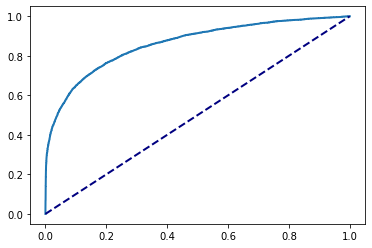

In [11]:
clf, params_lr, est_lr = modelling.train_lr_classifier(X, y, n_iter=30)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 120.8min finished


training score: 0.973783460583203
testing score: 0.8871050824175825
{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'gini', 'ccp_alpha': 0.0, 'bootstrap': True}
AUC: 0.9231062547228011


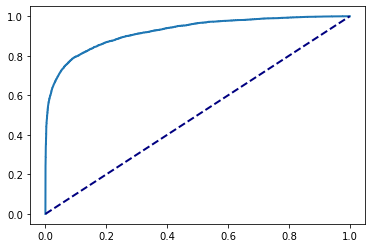

In [12]:
clf, params_rf, est_rf = modelling.train_rf_classifier(X, y, n_iter=30)

In [13]:
from sklearn.ensemble import VotingClassifier
rf = est_rf(**params_rf)
lr = est_lr(**params_lr)
model = VotingClassifier(estimators=[('lr', lr), ('rf', rf)], voting='hard')
model.fit(X, y)

/Users/chenjieyang/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=2000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                           

In [23]:
lr.fit(X, y)

/Users/chenjieyang/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
df_inf = pd.read_csv('./data/test_transaction.csv')
df_inf['isFraud'] = lr.predict(dp.transform(df_inf).values)
df_inf = df_inf.reset_index()[['TransactionID', 'isFraud']]
df_inf.to_csv('./data/inf.csv', index=False)
# df_inf = df_inf.reset_index().rename(columns={'passengerid': 'PassengerId'})
# df_inf[['PassengerId', 'Survived']].to_csv('./data/inf.csv', index=False)

In [25]:
5500/6347

0.8665511265164645